#IE6400 Foundations Data Analytics Engineering
##Fall Semester 2023
##Group Projects
###Project 1:
####Topic: Cleaning and Analyzing Crime Data


In [ ]:
import pandas as pd
import io
!pip install prophet

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crime_Data_from_2020_to_Present.csv to Crime_Data_from_2020_to_Present.csv


In [ ]:
df = pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')

In [ ]:
print(df.head())
df.dtypes

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [ ]:
print("Column names and Descriptions")
for column in df.columns:
  print(column, df[column].describe())

Column names and Descriptions
DR_NO count    8.158820e+05
mean     2.160434e+08
std      1.080151e+07
min      8.170000e+02
25%      2.101222e+08
50%      2.201145e+08
75%      2.219155e+08
max      2.399165e+08
Name: DR_NO, dtype: float64
Date Rptd count                     815882
unique                      1378
top       02/03/2023 12:00:00 AM
freq                         924
Name: Date Rptd, dtype: object
DATE OCC count                     815882
unique                      1378
top       12/02/2022 12:00:00 AM
freq                        1130
Name: DATE OCC, dtype: object
TIME OCC count    815882.000000
mean       1335.614658
std         654.102822
min           1.000000
25%         900.000000
50%        1415.000000
75%        1900.000000
max        2359.000000
Name: TIME OCC, dtype: float64
AREA count    815882.000000
mean         10.711521
std           6.092813
min           1.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          21.000000
Nam

In [ ]:
print(df.isnull())

missing_data = df.isnull().sum()
percent_missing = (df.isnull().sum() / df.shape[0] * 100)

mis_val_table = pd.DataFrame({'Missing Values': missing_data, '% of Total Values': percent_missing})
print(mis_val_table)

        DR_NO  Date Rptd  DATE OCC  TIME OCC   AREA  AREA NAME  Rpt Dist No  \
0       False      False     False     False  False      False        False   
1       False      False     False     False  False      False        False   
2       False      False     False     False  False      False        False   
3       False      False     False     False  False      False        False   
4       False      False     False     False  False      False        False   
...       ...        ...       ...       ...    ...        ...          ...   
815877  False      False     False     False  False      False        False   
815878  False      False     False     False  False      False        False   
815879  False      False     False     False  False      False        False   
815880  False      False     False     False  False      False        False   
815881  False      False     False     False  False      False        False   

        Part 1-2  Crm Cd  Crm Cd Desc  ...  Status 

In [ ]:
#Drop columns with very high percentage of missing values
df = df.drop(columns=['Crm Cd 4', 'Crm Cd 3', 'Crm Cd 2'])

#Fill categorical columns with 'Unknown' or mode
categorical_columns = ['Weapon Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc']
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna('Unknown', inplace=True)

#Fill numerical columns with median
numerical_columns = ['Weapon Used Cd', 'Premis Cd', 'Crm Cd 1']
for col in numerical_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

#For 'Cross Street' and 'Mocodes', we fill with 'Unknown' since they are categorical
df['Cross Street'].fillna('Unknown', inplace=True)
df['Mocodes'].fillna('Unknown', inplace=True)

missing_data_after = df.isnull().sum()
missing_columns_after = missing_data_after[missing_data_after > 0]

missing_columns_after

Series([], dtype: int64)

In [ ]:
missing_data = df.isnull().sum()
percent_missing = (df.isnull().sum() / df.shape[0] * 100)

mis_val_table = pd.DataFrame({'Missing Values': missing_data, '% of Total Values': percent_missing})
print(mis_val_table)

                Missing Values  % of Total Values
DR_NO                        0                0.0
Date Rptd                    0                0.0
DATE OCC                     0                0.0
TIME OCC                     0                0.0
AREA                         0                0.0
AREA NAME                    0                0.0
Rpt Dist No                  0                0.0
Part 1-2                     0                0.0
Crm Cd                       0                0.0
Crm Cd Desc                  0                0.0
Mocodes                      0                0.0
Vict Age                     0                0.0
Vict Sex                     0                0.0
Vict Descent                 0                0.0
Premis Cd                    0                0.0
Premis Desc                  0                0.0
Weapon Used Cd               0                0.0
Weapon Desc                  0                0.0
Status                       0                0.0


In [ ]:
duplicate_rows = df[df.duplicated()]

# Number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]

num_duplicate_rows, df.shape

(0, (815882, 25))

In [ ]:
# Check current data types of the columns
current_data_types = df.dtypes

# Convert date columns to datetime format
date_columns = ['Date Rptd', 'DATE OCC']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Convert numerical columns to appropriate numeric types
numeric_columns = ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd 1', 'Weapon Used Cd', 'Premis Cd', 'LAT', 'LON']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')#If 'coerce', then invalid parsing will be set as NaN.

updated_data_types = df.dtypes

data_type_changes = pd.DataFrame({ 'Original Data Type': current_data_types, 'Updated Data Type': updated_data_types})

print(data_type_changes)

               Original Data Type Updated Data Type
DR_NO                       int64             int64
Date Rptd                  object    datetime64[ns]
DATE OCC                   object    datetime64[ns]
TIME OCC                    int64             int64
AREA                        int64             int64
AREA NAME                  object            object
Rpt Dist No                 int64             int64
Part 1-2                    int64             int64
Crm Cd                      int64             int64
Crm Cd Desc                object            object
Mocodes                    object            object
Vict Age                    int64             int64
Vict Sex                   object            object
Vict Descent               object            object
Premis Cd                 float64           float64
Premis Desc                object            object
Weapon Used Cd            float64           float64
Weapon Desc                object            object
Status      

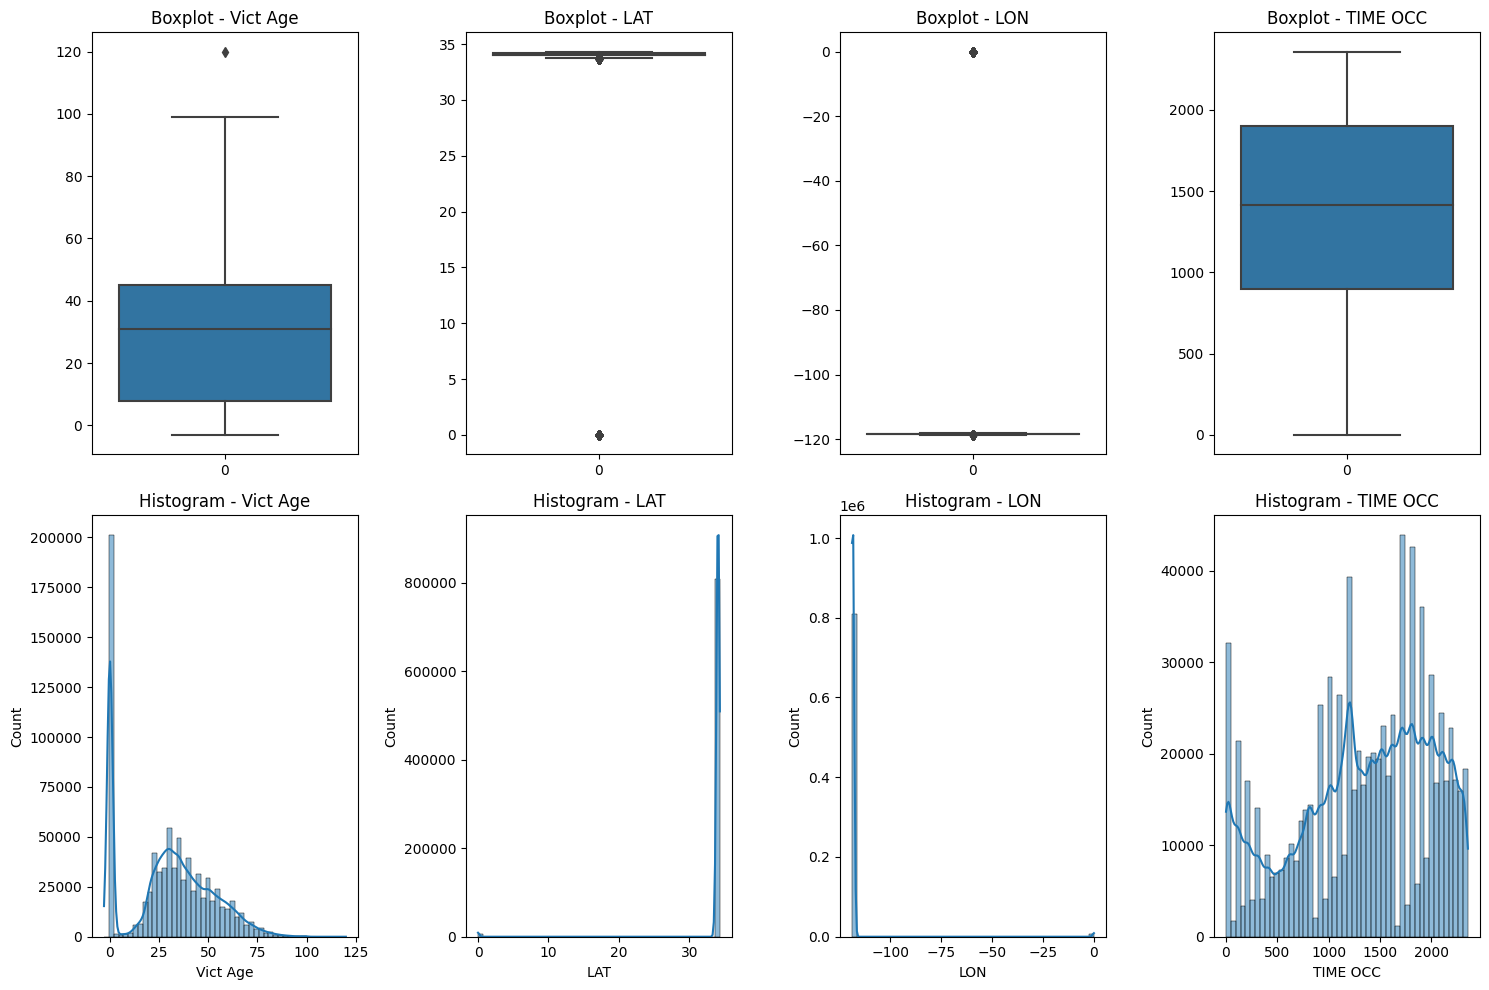

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
columns_to_check = ['Vict Age', 'LAT', 'LON', 'TIME OCC']

# Plotting the distributions and boxplots for these columns
plt.figure(figsize=(15, 10))

for idx, col in enumerate(columns_to_check, 1):
    plt.subplot(2, len(columns_to_check), idx)
    sns.boxplot(df[col])
    plt.title(f"Boxplot - {col}")

    plt.subplot(2, len(columns_to_check), idx + len(columns_to_check))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Histogram - {col}")

plt.tight_layout()
plt.show()

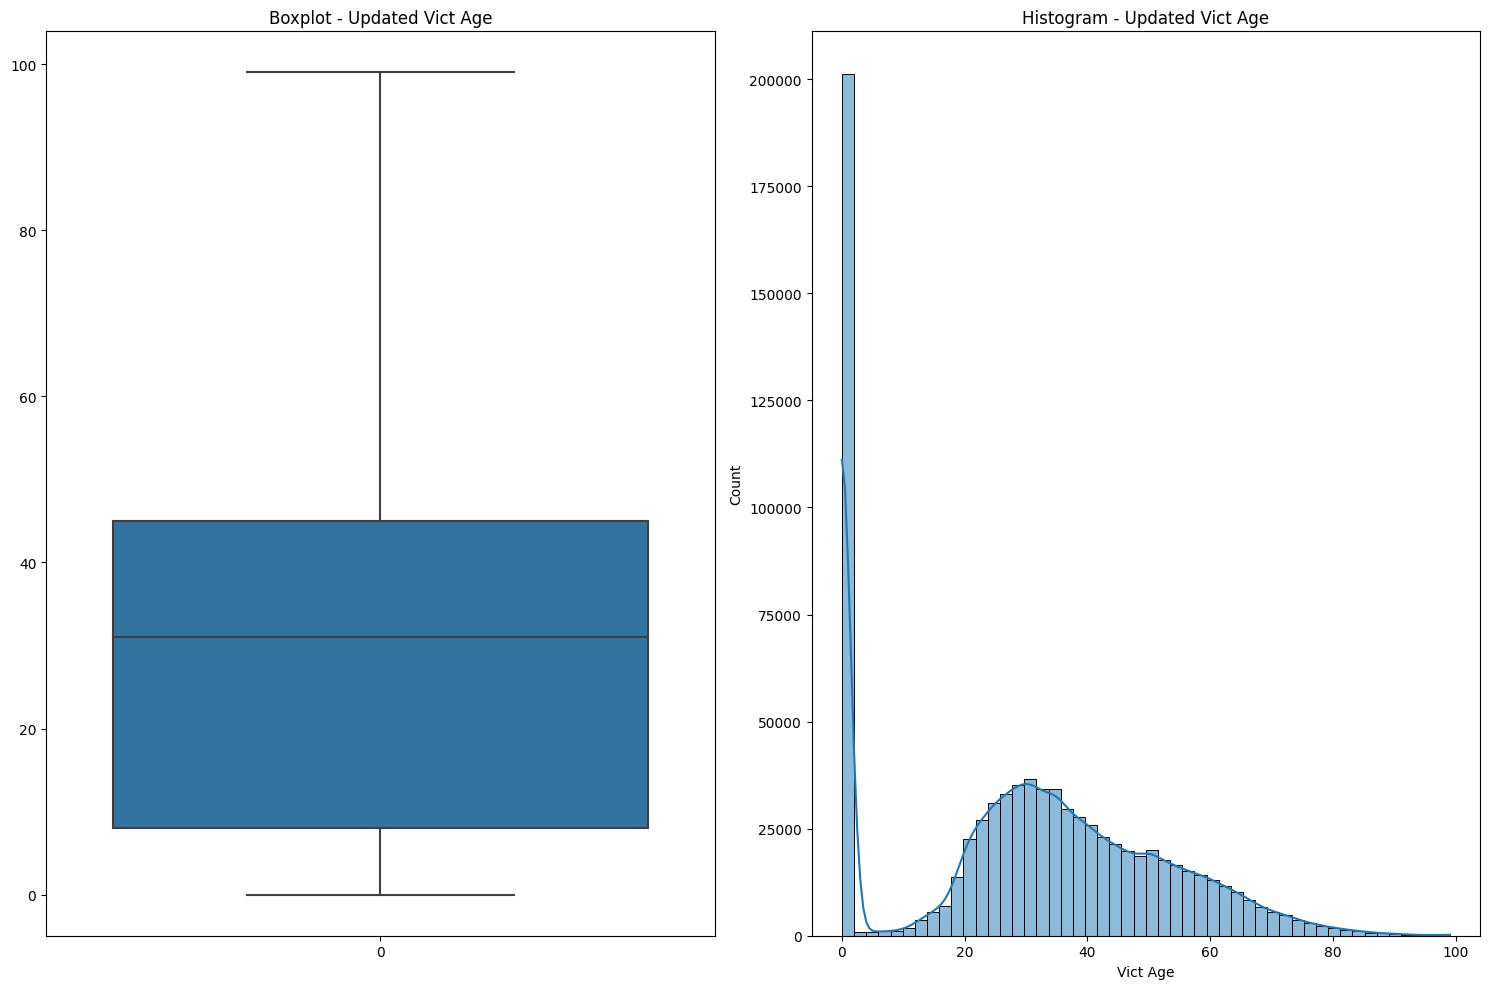

In [ ]:
# Calculate the median age
median_age = df['Vict Age'].median()

# Replace outliers in 'Vict Age' with the median age
df['Vict Age'] = df['Vict Age'].apply(lambda x: median_age if x < 0 or x > 100 else x)

# Visualize the updated 'Vict Age' column
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
sns.boxplot(df['Vict Age'])
plt.title("Boxplot - Updated Vict Age")

plt.subplot(1, 2, 2)
sns.histplot(df['Vict Age'], bins=50, kde=True)
plt.title("Histogram - Updated Vict Age")

plt.tight_layout()
plt.show()

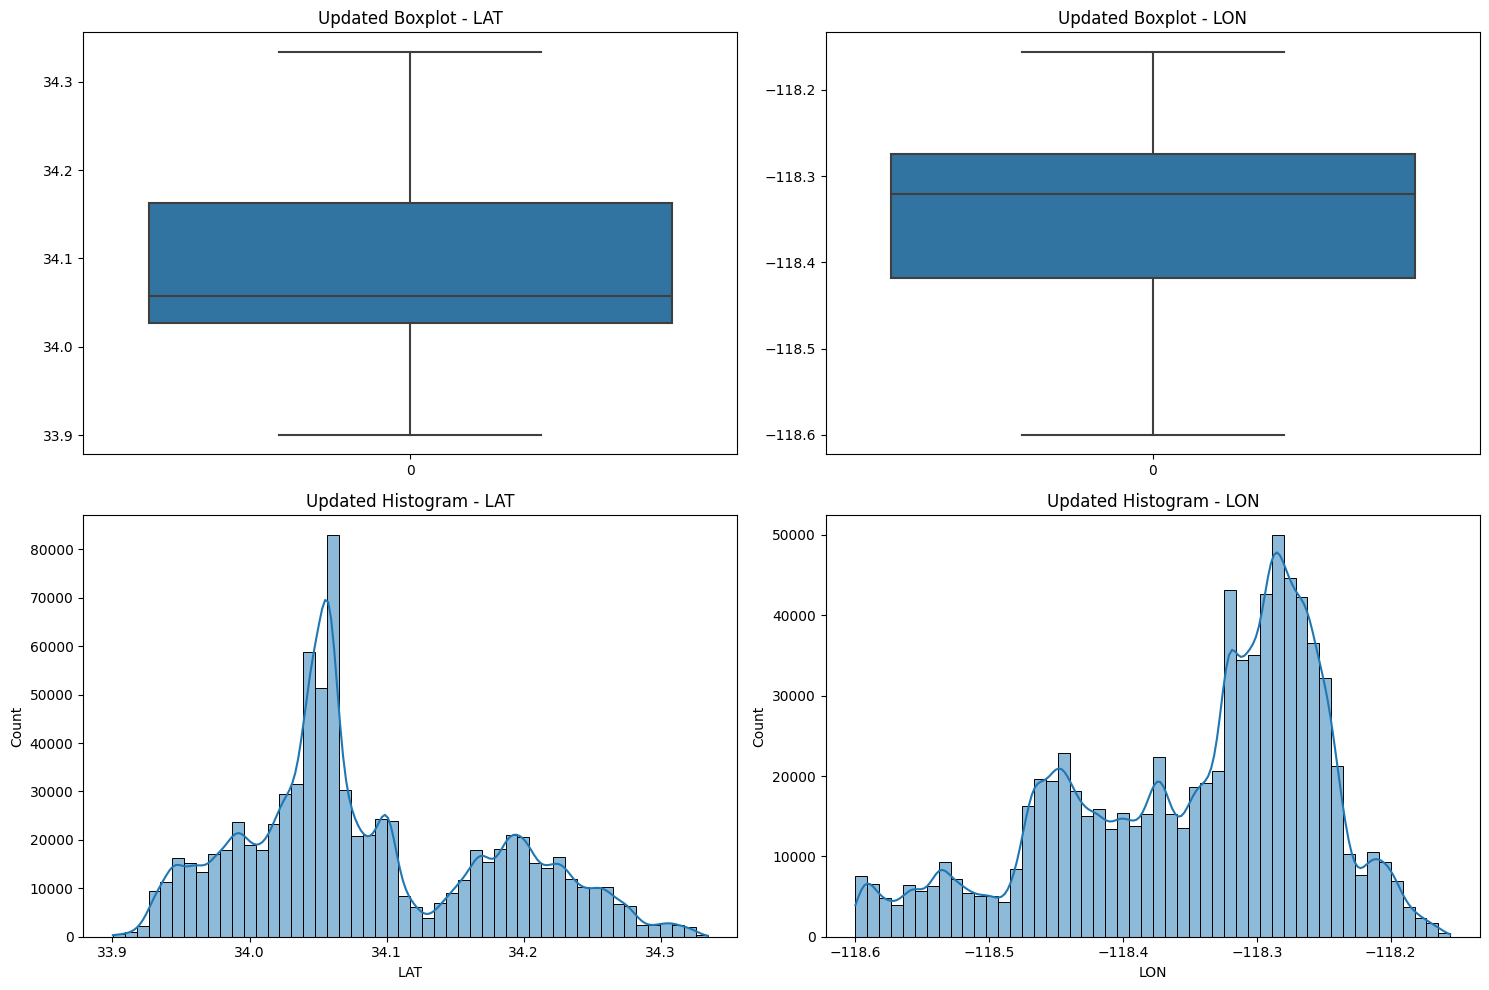

In [ ]:
# Calculate the median LAT and LOG
median_lat = df['LAT'].median()
median_lon = df['LON'].median()

df['LAT'] = df['LAT'].apply(lambda x: median_lat if x < 33.9 or x > 34.5 else x)
df['LON'] = df['LON'].apply(lambda x: median_lon if x < -118.6 or x > -117.5 else x)

columns_to_check = ['LAT', 'LON']

plt.figure(figsize=(15, 10))

for idx, col in enumerate(columns_to_check, 1):
    plt.subplot(2, len(columns_to_check), idx)
    sns.boxplot(df[col])
    plt.title(f"Updated Boxplot - {col}")

    plt.subplot(2, len(columns_to_check), idx + len(columns_to_check))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Updated Histogram - {col}")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Standardize 'Vict Age'
df['Vict Age'] = standard_scaler.fit_transform(df[['Vict Age']])

# Normalize 'TIME OCC', 'LAT', and 'LON'
df['TIME OCC'] = minmax_scaler.fit_transform(df[['TIME OCC']])
df['LAT'] = minmax_scaler.fit_transform(df[['LAT']])
df['LON'] = minmax_scaler.fit_transform(df[['LON']])

print(df[['Vict Age', 'TIME OCC', 'LAT', 'LON']].head())

   Vict Age  TIME OCC       LAT       LON
0  0.283795  0.945293  0.262212  0.679712
1 -0.221471  0.139525  0.335484  0.777103
2 -1.369802  0.508482  0.332949  0.793072
3  2.121125  0.733249  0.617972  0.445569
4  0.054129  0.175573  0.736175  0.344579


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns for one-hot encoding
one_hot_columns = ['AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc']

# Columns for label encoding
label_columns = ['Mocodes', 'LOCATION', 'Cross Street']

# Perform one-hot encoding
data_encoded = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# Perform label encoding
label_encoders = {}
for col in label_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

print(data_encoded.head())

       DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA  Rpt Dist No  Part 1-2  \
0   10304468 2020-01-08 2020-01-08  0.945293     3          377         2   
1  190101086 2020-01-02 2020-01-01  0.139525     1          163         2   
2  200110444 2020-04-14 2020-02-13  0.508482     1          155         2   
3  191501505 2020-01-01 2020-01-01  0.733249    15         1543         2   
4  191921269 2020-01-01 2020-01-01  0.175573    19         1998         2   

   Crm Cd  Mocodes  Vict Age  ...  Status_AO  Status_CC  Status_IC  Status_JA  \
0     624    92297  0.283795  ...          1          0          0          0   
1     624    81980 -0.221471  ...          0          0          1          0   
2     845   192208 -1.369802  ...          0          0          0          0   
3     745    19534  2.121125  ...          0          0          1          0   
4     740    14091  0.054129  ...          0          0          1          0   

   Status_JO  Status Desc_Adult Other  Status Desc

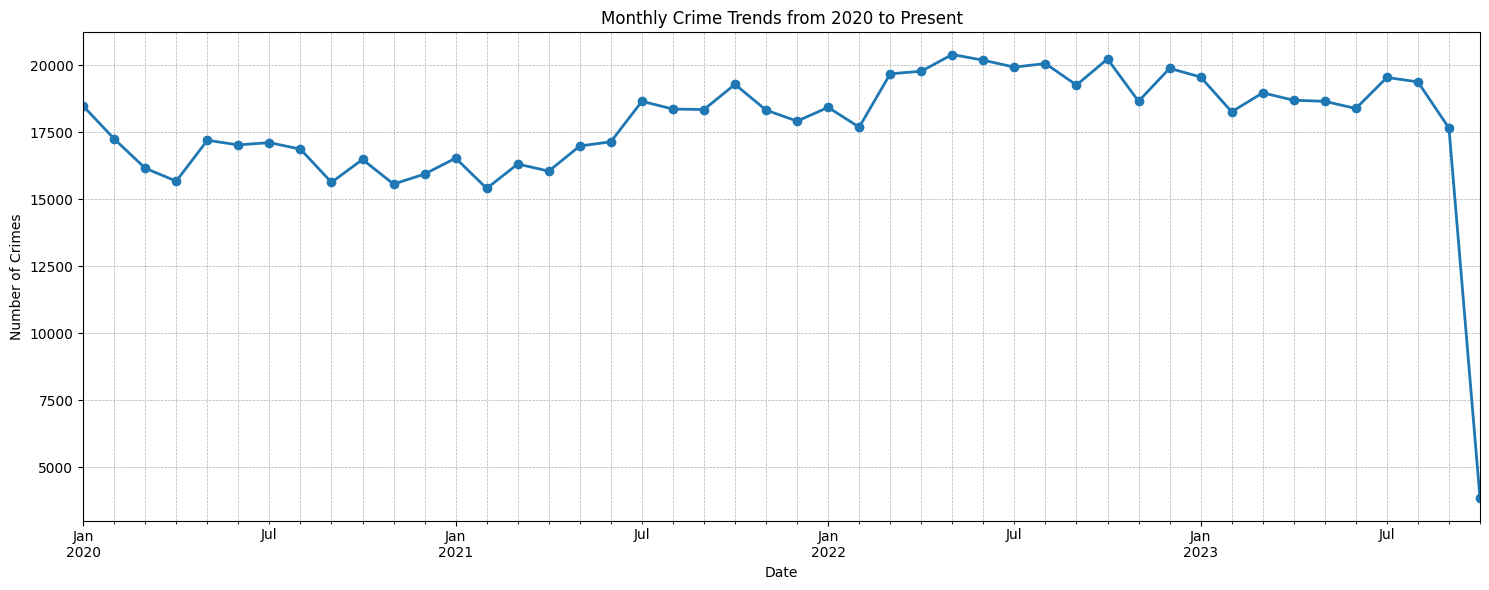

In [ ]:
# Group data by month and count the number of crimes for each month
crime_trends = df.groupby(df['DATE OCC'].dt.to_period("M")).size()

plt.figure(figsize=(15, 6))
crime_trends.plot(linewidth=2, marker='o')
plt.title('Monthly Crime Trends from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Count the occurrences of each crime type
crime_counts = df['Crm Cd Desc'].value_counts()

most_common_crime = crime_counts.idxmax()
most_common_crime_count = crime_counts.max()

most_common_crime, most_common_crime_count

('VEHICLE - STOLEN', 87356)

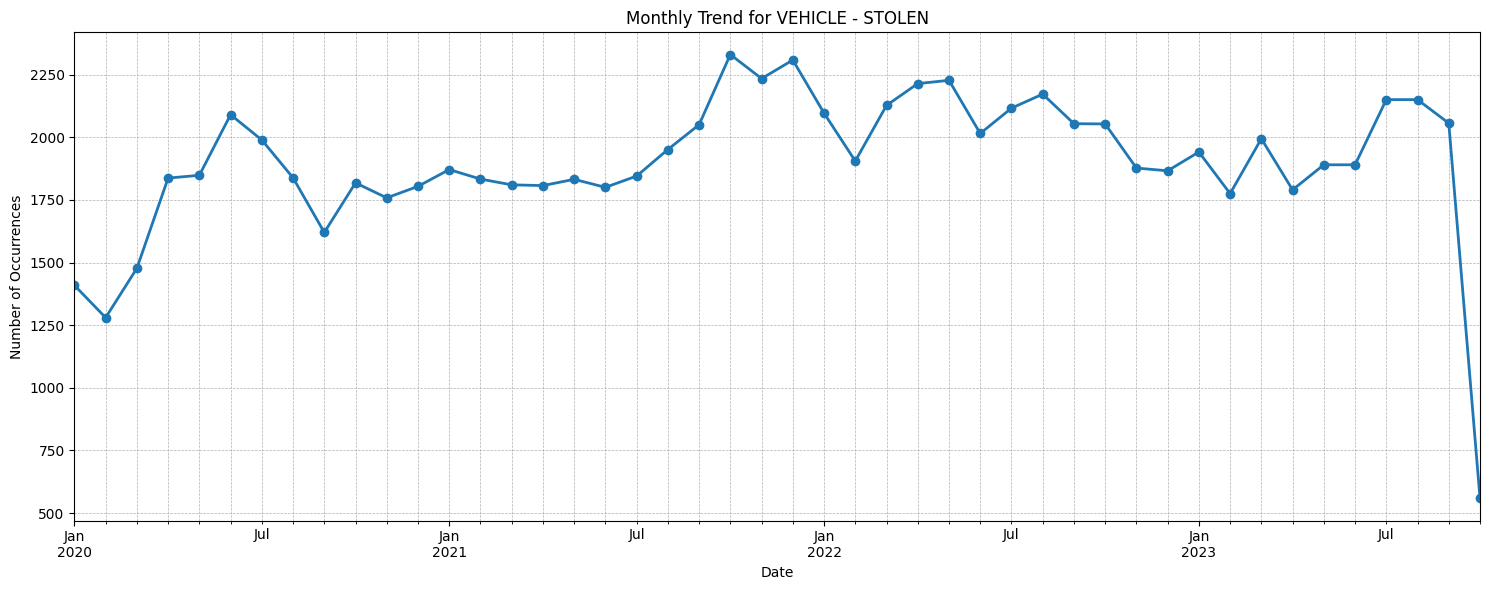

In [ ]:
# Filter data for the most common crime and group by month to get the trend
most_common_crime_trend = df[df['Crm Cd Desc'] == most_common_crime].groupby(df['DATE OCC'].dt.to_period("M")).size()

plt.figure(figsize=(15, 6))
most_common_crime_trend.plot(linewidth=2, marker='o')
plt.title(f'Monthly Trend for {most_common_crime}')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

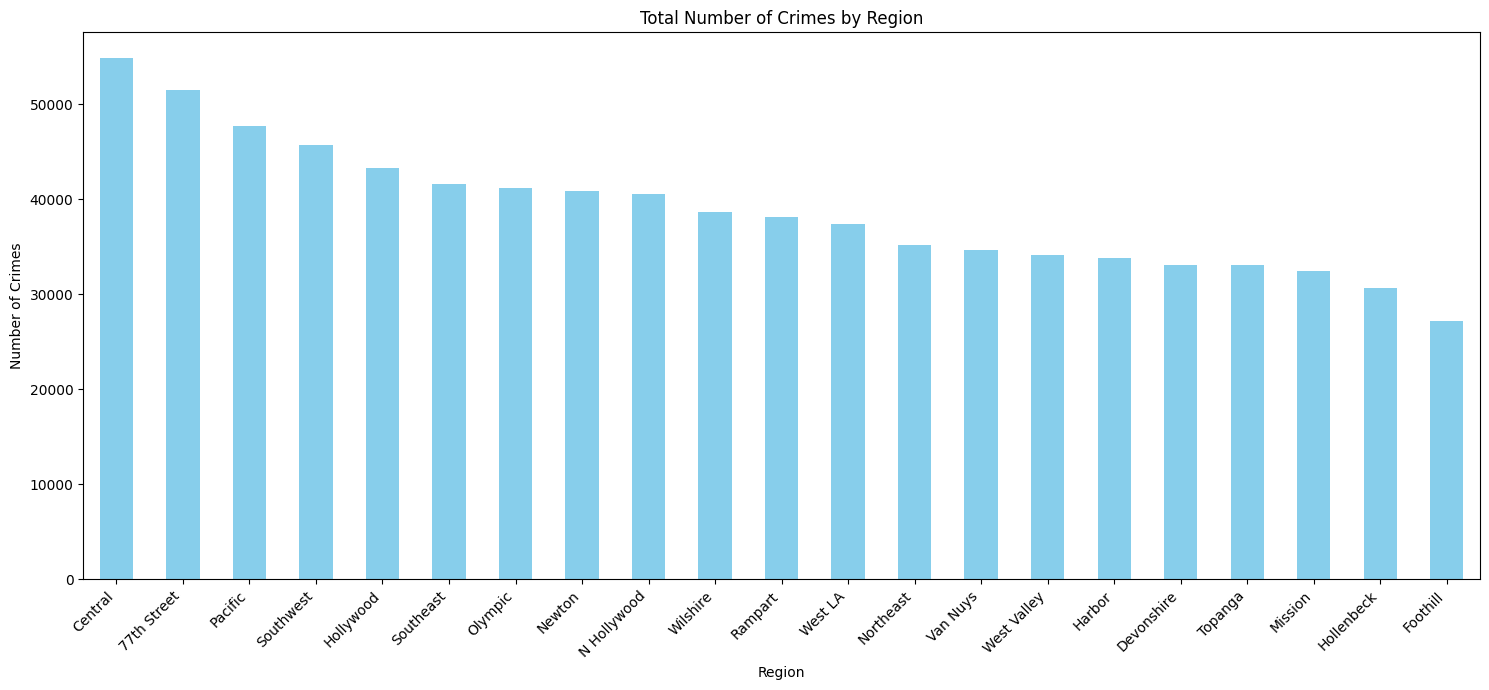

In [ ]:
# Aggregate data by 'AREA NAME' to get the total number of crimes for each region
crime_by_area = df['AREA NAME'].value_counts()

plt.figure(figsize=(15, 7))
crime_by_area.plot(kind='bar', color='skyblue')
plt.title('Total Number of Crimes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

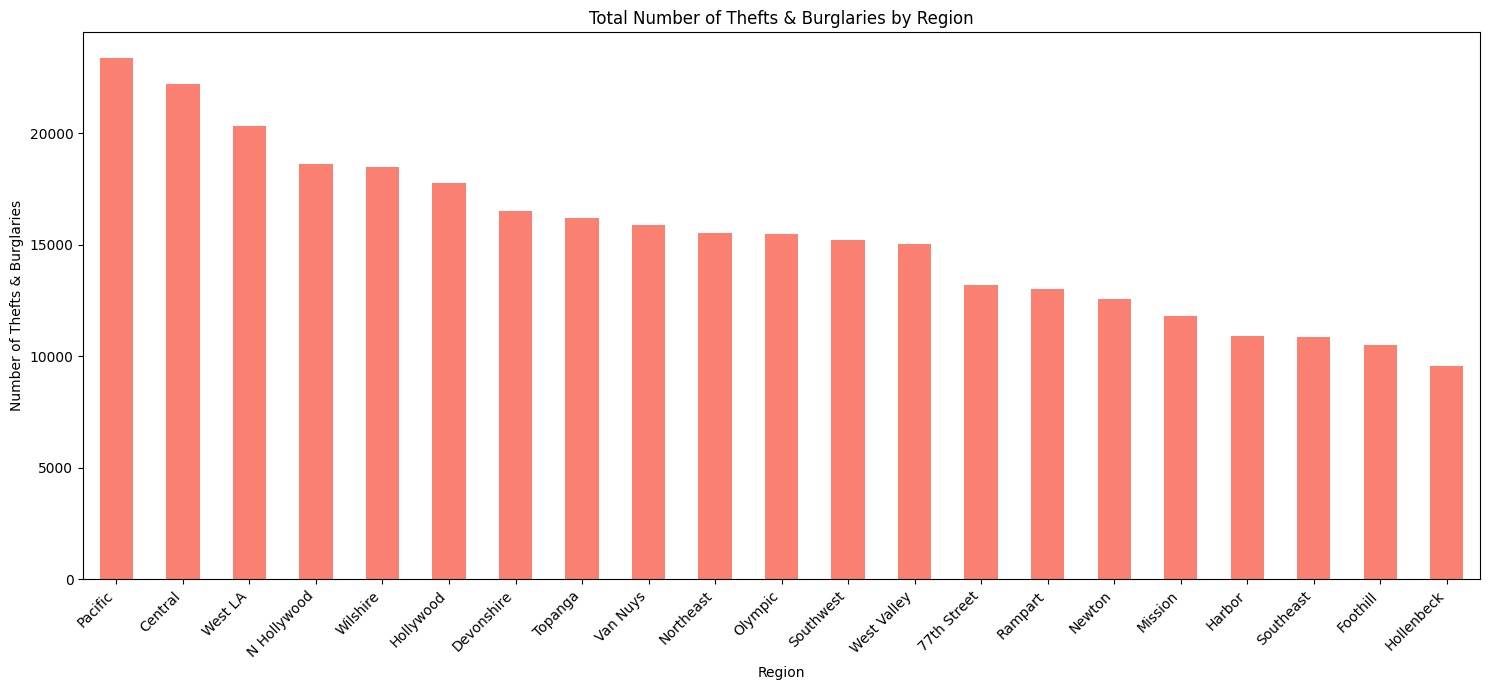

In [ ]:
# Filter data for specific crime types indicative of economic challenges
economically_related_crimes = df[df['Crm Cd Desc'].str.contains('THEFT|BURGLARY', na=False, case=False)]

# Group data by 'AREA NAME' to get the total number of these specific crimes for each region
economically_related_crimes_by_area = economically_related_crimes['AREA NAME'].value_counts()

plt.figure(figsize=(15, 7))
economically_related_crimes_by_area.plot(kind='bar', color='salmon')
plt.title('Total Number of Thefts & Burglaries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Thefts & Burglaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

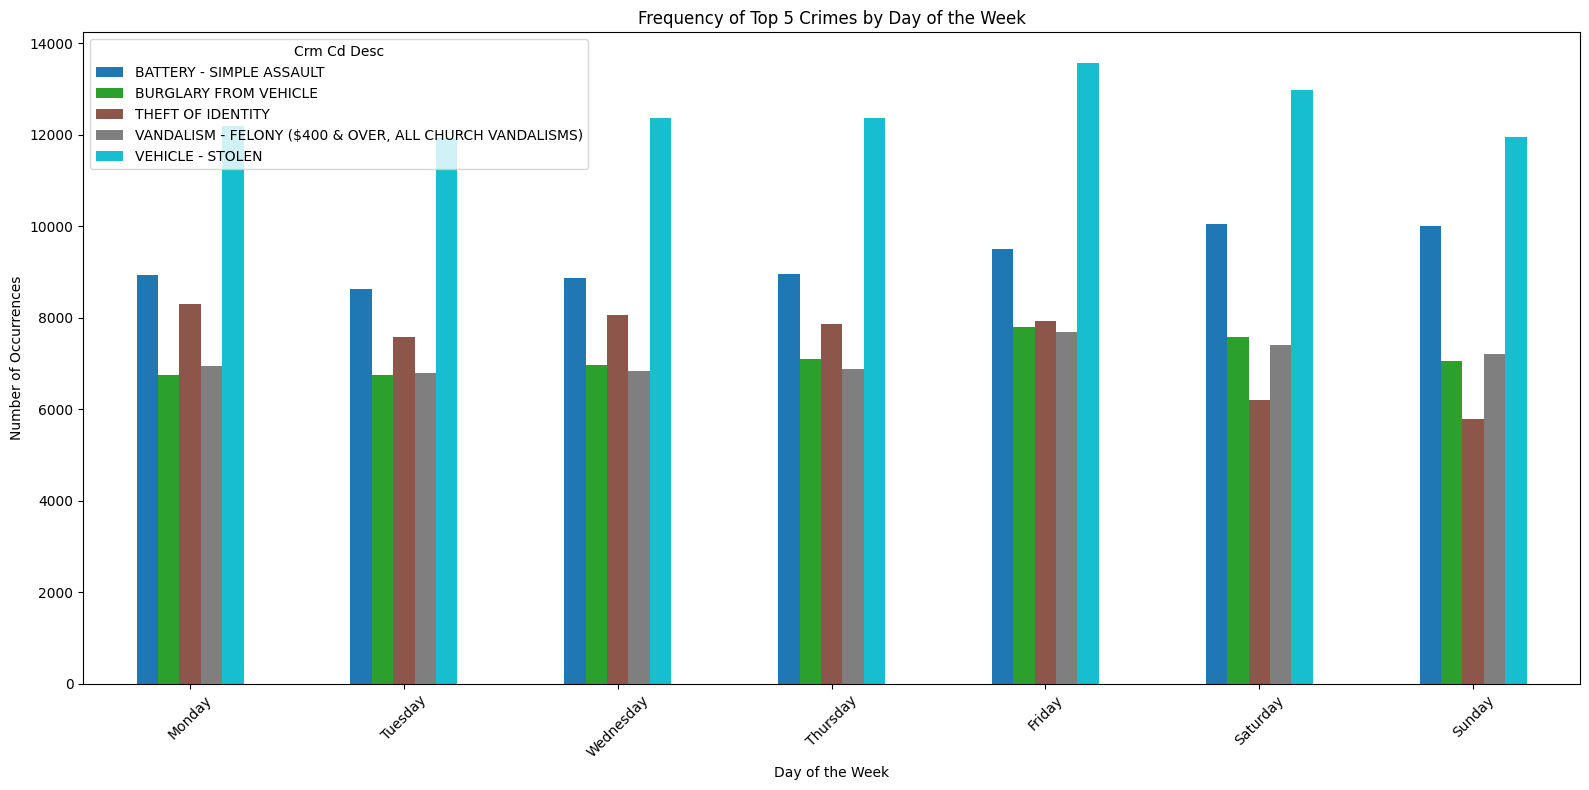

In [ ]:
# Extract the day of the week from the 'DATE OCC' column
df['Day of Week'] = df['DATE OCC'].dt.day_name()

# top 5 most common crimes for visualization
top_5_crimes = df['Crm Cd Desc'].value_counts().head(5).index.tolist()

# Filter the dataset for these top 5 crimes
filtered_data = df[df['Crm Cd Desc'].isin(top_5_crimes)]

# Group by the day of the week and the type of crime and count the occurrences
crime_by_day = filtered_data.groupby(['Day of Week', 'Crm Cd Desc']).size().unstack()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_by_day = crime_by_day.reindex(order)

crime_by_day.plot(kind='bar', figsize=(16, 8), colormap='tab10')
plt.title('Frequency of Top 5 Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

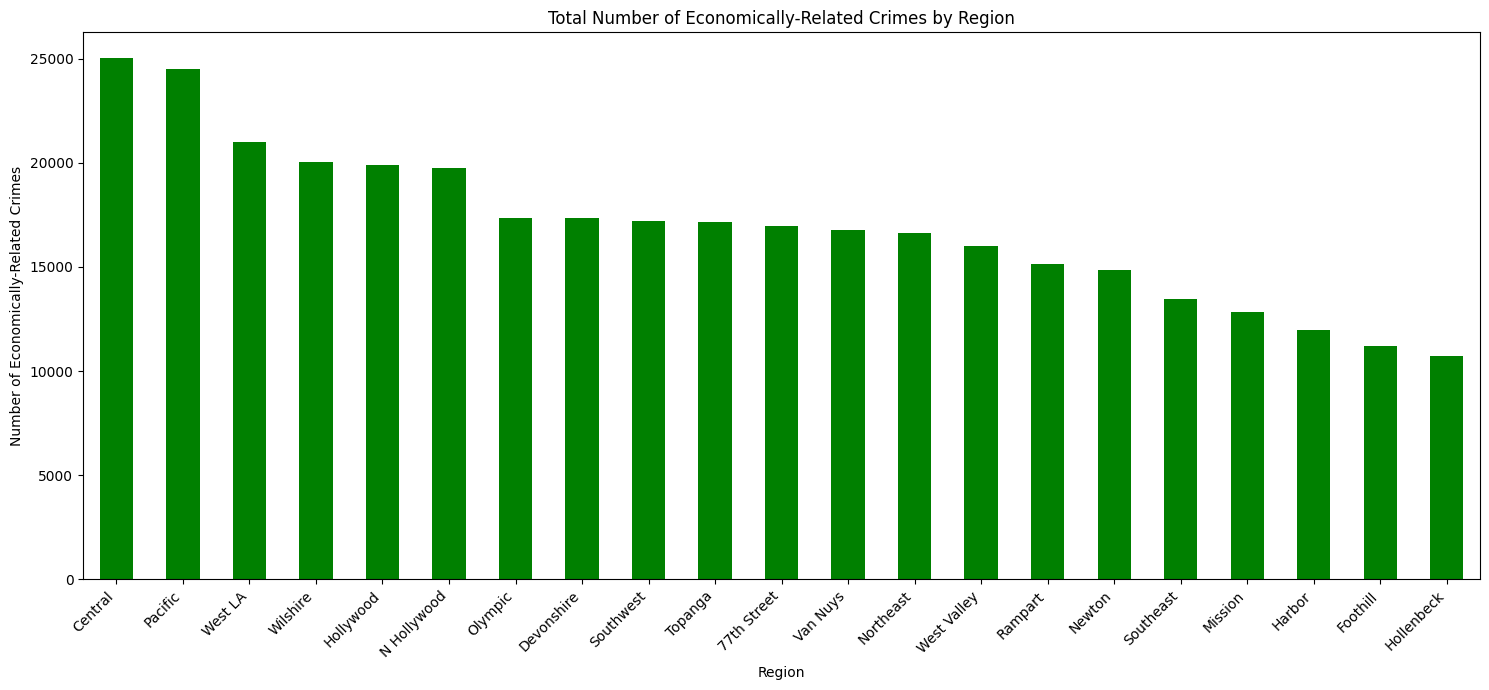

In [ ]:
# Filter data for specific crime types indicative of economic challenges
economically_related_crimes_list = ["THEFT", "BURGLARY", "ROBBERY", "FRAUD", "EMBEZZLEMENT"]
economically_related_crimes_data = df[df['Crm Cd Desc'].str.contains('|'.join(economically_related_crimes_list), na=False, case=False)]

# Aggregate data by 'AREA NAME' to get the total number of these specific crimes for each region
economically_related_crimes_by_area_2 = economically_related_crimes_data['AREA NAME'].value_counts()

plt.figure(figsize=(15, 7))
economically_related_crimes_by_area_2.plot(kind='bar', color='green')
plt.title('Total Number of Economically-Related Crimes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Economically-Related Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

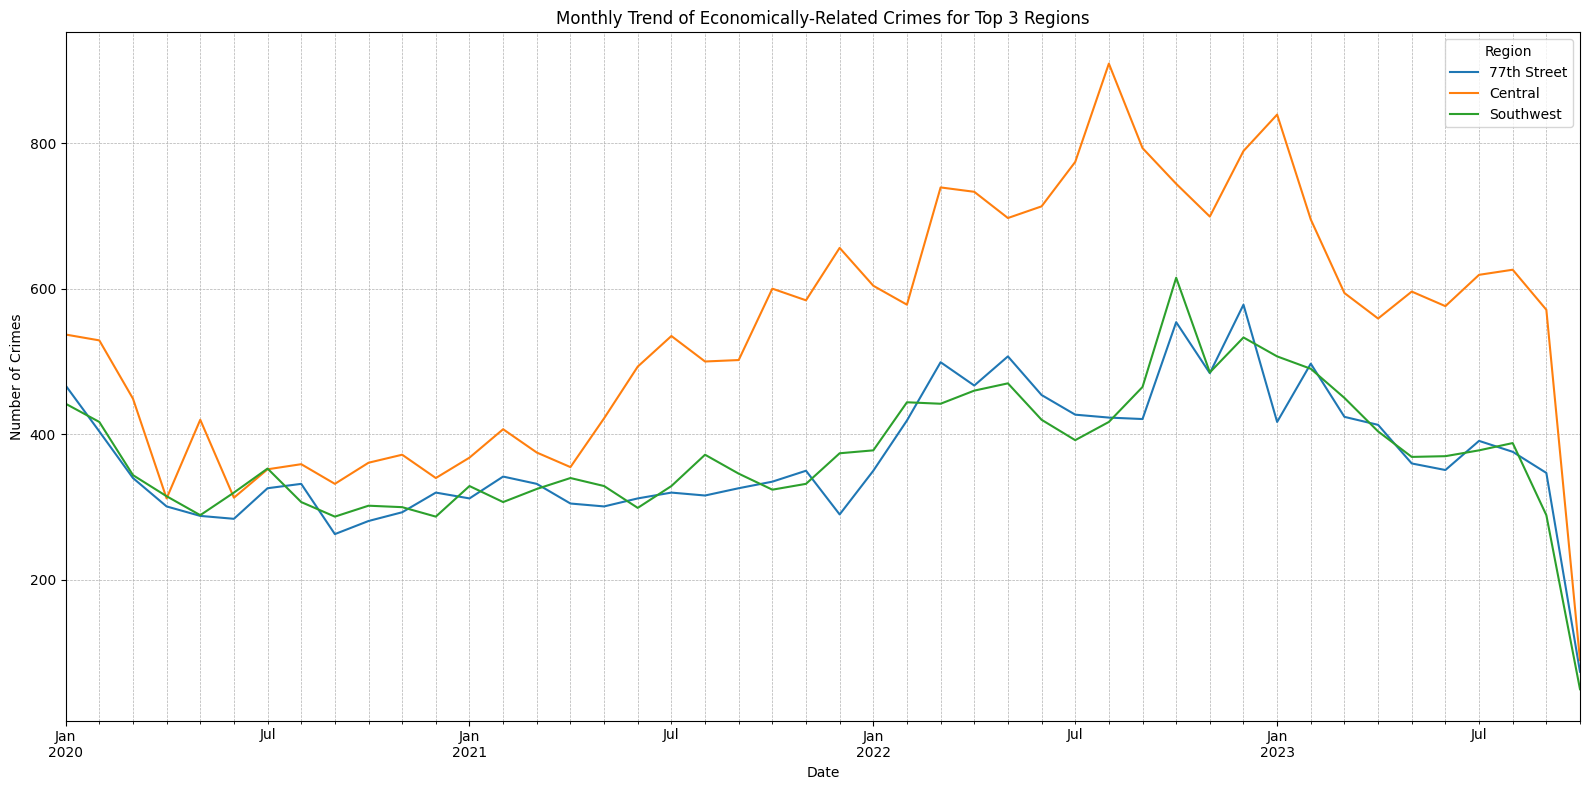

In [ ]:
# Select the top 3 regions with the highest rates of economically-related crimes
top_regions = ["Central", "Southwest", "77th Street"]

# Filter the dataset for these specific regions and crime types
filtered_data_for_trends = economically_related_crimes_data[economically_related_crimes_data['AREA NAME'].isin(top_regions)]

# Group by month and region to get the trend over time
crime_trends_by_region = filtered_data_for_trends.groupby([filtered_data_for_trends['DATE OCC'].dt.to_period("M"), 'AREA NAME']).size().unstack()

plt.figure(figsize=(16, 8))
crime_trends_by_region.plot(ax=plt.gca())
plt.title('Monthly Trend of Economically-Related Crimes for Top 3 Regions')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend(title='Region')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Group the filtered data by region and crime type to get the breakdown
crime_breakdown_by_region = filtered_data_for_trends.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack()

# Plotting the breakdown of economically-related crimes by type for each region
crime_breakdown_by_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Breakdown of Economically-Related Crimes by Type for Top 3 Regions')
plt.xlabel('Region')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()

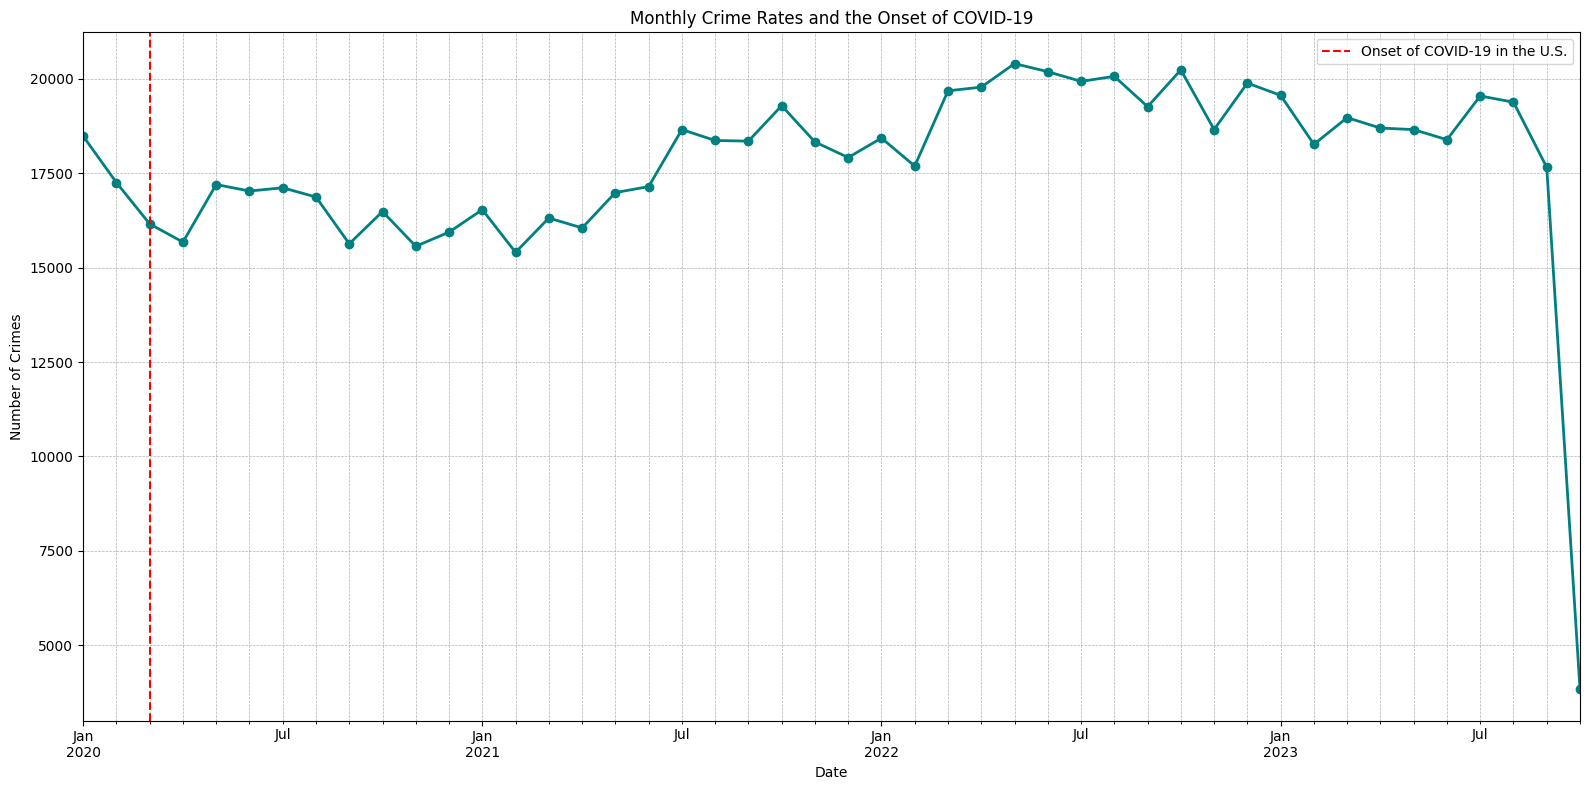

In [ ]:
# Extract monthly crime rates for the dataset
monthly_crime_rates = df.groupby(df['DATE OCC'].dt.to_period("M")).size()

# Plotting the crime rates around the onset of the COVID-19 pandemic
plt.figure(figsize=(16, 8))
monthly_crime_rates.plot(linewidth=2, marker='o', color='teal')
plt.axvline(pd.Timestamp('2020-03'), color='red', linestyle='--', label='Onset of COVID-19 in the U.S.')
plt.title('Monthly Crime Rates and the Onset of COVID-19')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Register converters for plotting
register_matplotlib_converters()

# Aggregate data on a monthly basis
monthly_crimes = df.resample('M', on='DATE OCC').size()

# Split data into train and test
train = monthly_crimes[:-12]

# Define the ARIMA model (p,d,q) parameters. These can be fine-tuned for better performance, but we'll start with (5,1,0)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)

forecast

2022-11-30    20060.134799
2022-12-31    20019.810091
2023-01-31    19958.423609
2023-02-28    19990.602285
2023-03-31    20037.314281
2023-04-30    20014.303992
2023-05-31    20006.863825
2023-06-30    20006.763871
2023-07-31    20013.081791
2023-08-31    20013.474839
2023-09-30    20010.991834
2023-10-31    20010.738252
Freq: M, Name: predicted_mean, dtype: float64

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5js17uu9/4yjzzr85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5js17uu9/alhh1dg6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9130', 'data', 'file=/tmp/tmp5js17uu9/4yjzzr85.json', 'init=/tmp/tmp5js17uu9/alhh1dg6.json', 'output', 'file=/tmp/tmp5js17uu9/prophet_modelncuz8qi6/prophet_model-20231029210522.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:05:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


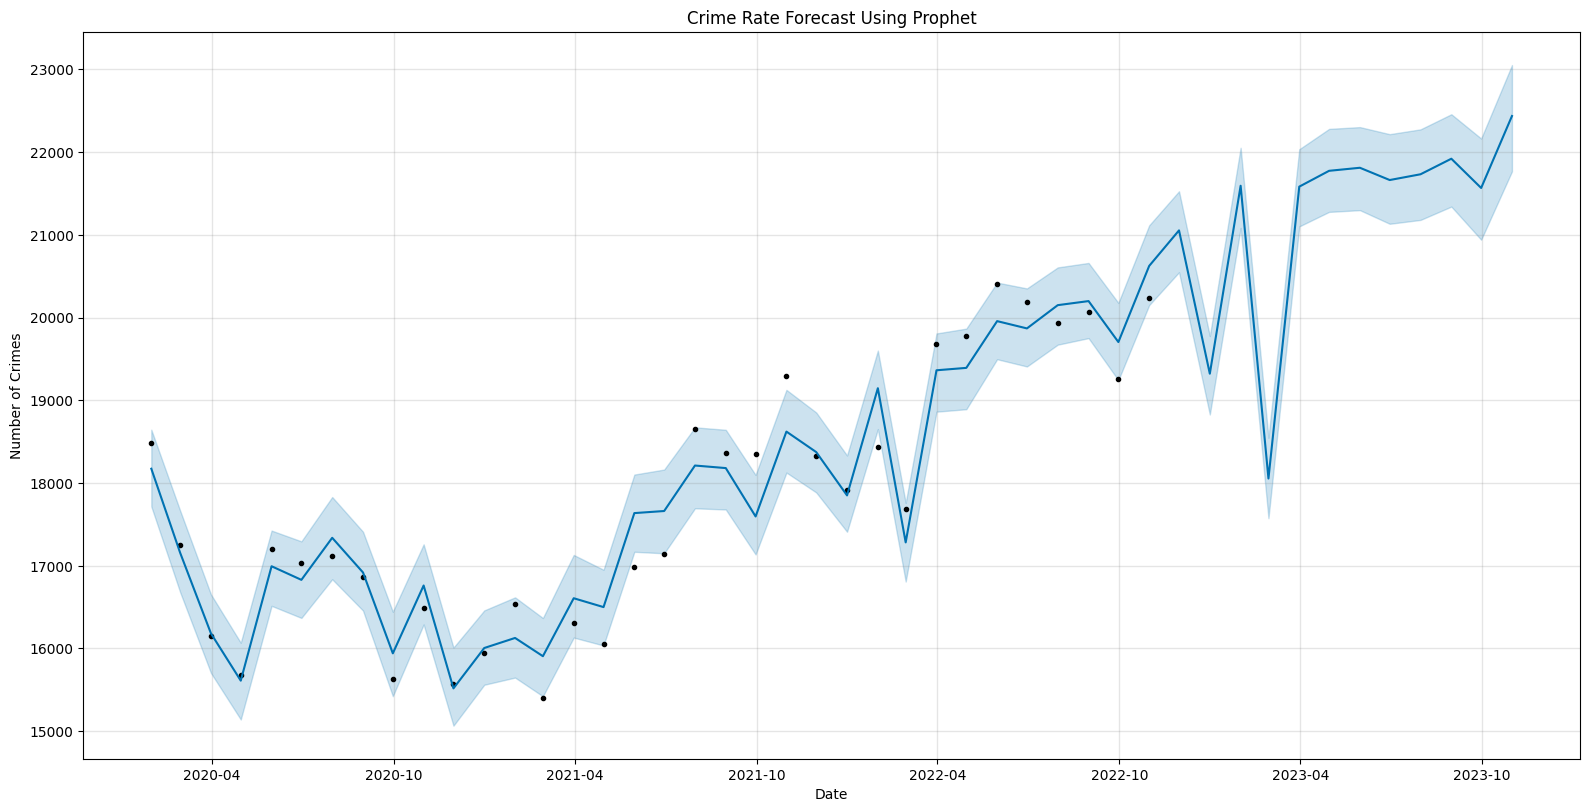

In [ ]:
from prophet import Prophet
# Prepare data for Prophet
prophet_data = monthly_crimes.reset_index()
prophet_data.columns = ['ds', 'y']

# Split data (excluding the last 12 months from training for visualization purposes)
train_prophet = prophet_data[:-12]

# Initialize and train the Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(train_prophet)

# Create a dataframe for future dates (next 12 months)
future = prophet_model.make_future_dataframe(periods=12, freq='M')

forecast_prophet = prophet_model.predict(future)

fig = prophet_model.plot(forecast_prophet, figsize=(16, 8))
plt.title('Crime Rate Forecast Using Prophet')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

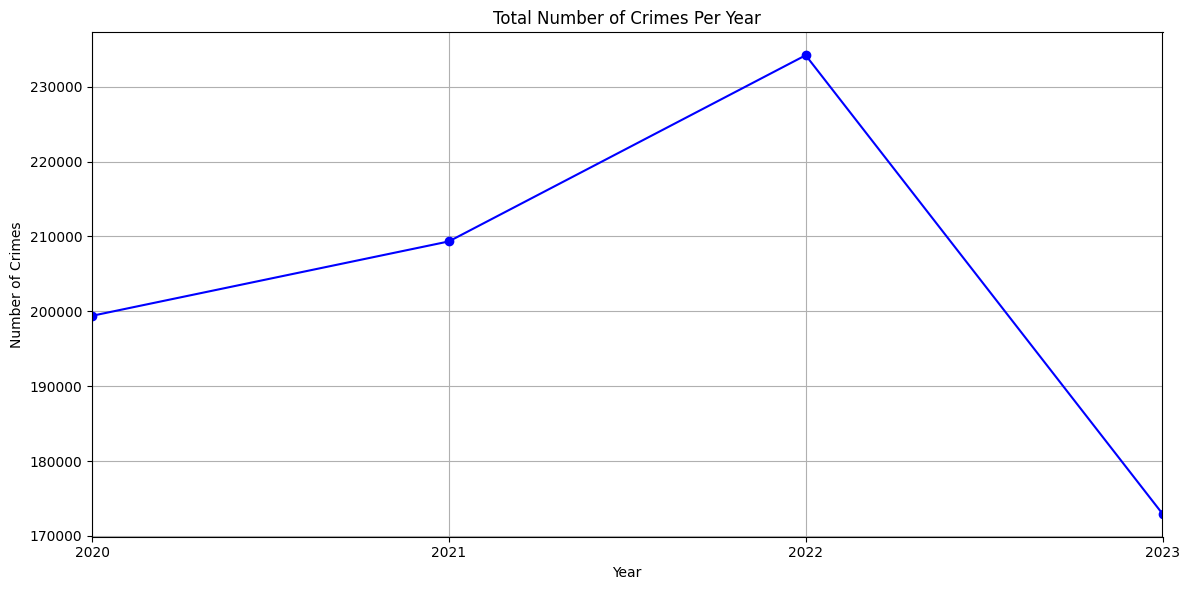

In [ ]:
# Group data by year and count the number of crimes
yearly_crimes = df.resample('Y', on='DATE OCC').size()

# Plotting the total number of crimes per year
plt.figure(figsize=(12, 6))
yearly_crimes.plot(kind='line', marker='o', color='blue')
plt.title('Total Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

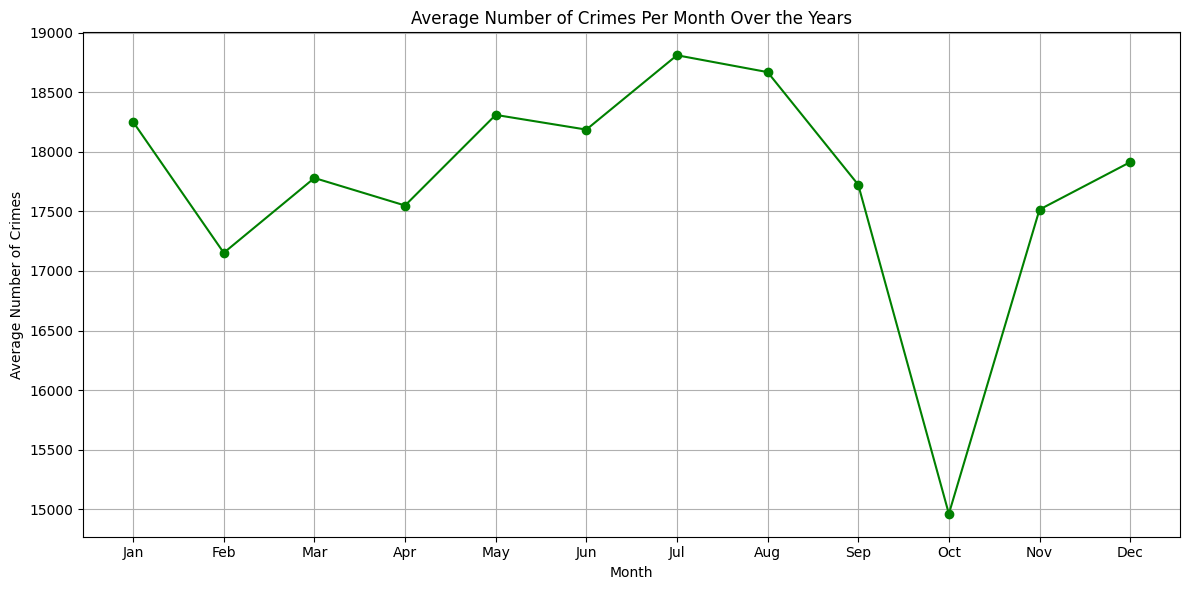

In [ ]:
# Group data by month and count the number of crimes
monthly_avg_crimes = df.resample('M', on='DATE OCC').size().groupby(lambda x: x.month).mean()

# Plotting the average number of crimes per month over the years
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
monthly_avg_crimes.plot(kind='line', marker='o', color='green')
plt.title('Average Number of Crimes Per Month Over the Years')
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=months)
plt.ylabel('Average Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
crime_counts = df['Crm Cd Desc'].value_counts()
crime_counts.plot(kind='bar', figsize=(16, 6))
plt.title('Frequency of Each Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.show()


NameError: ignored

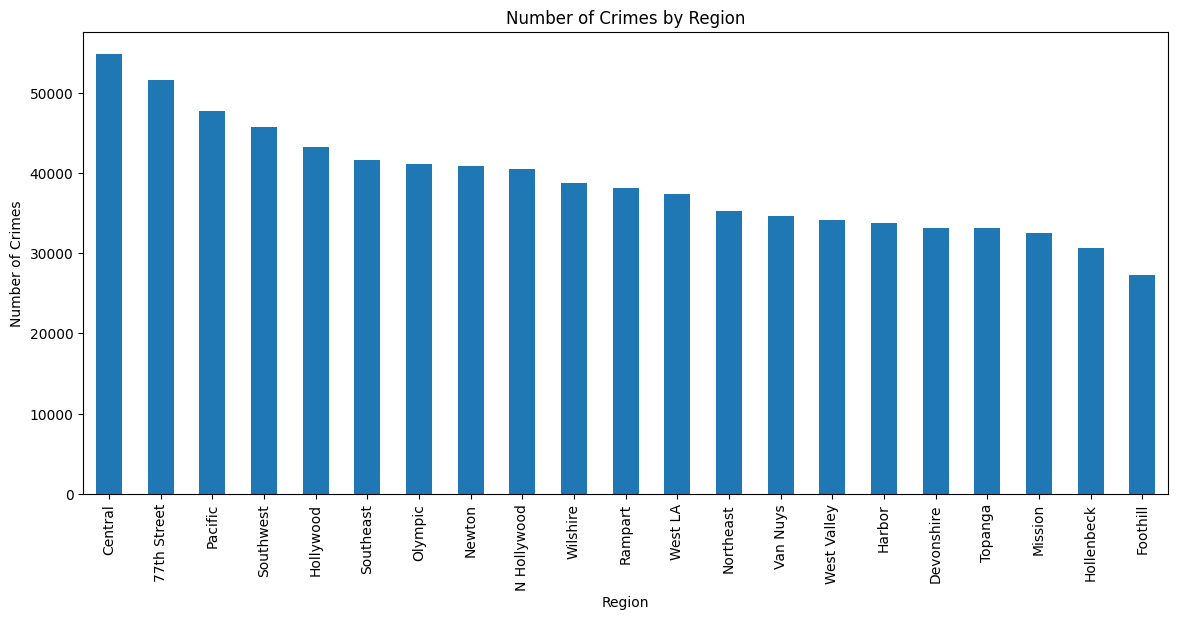

In [ ]:
regional_counts = df['AREA NAME'].value_counts()
regional_counts.plot(kind='bar', figsize=(14, 6))
plt.title('Number of Crimes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Crimes')
plt.show()


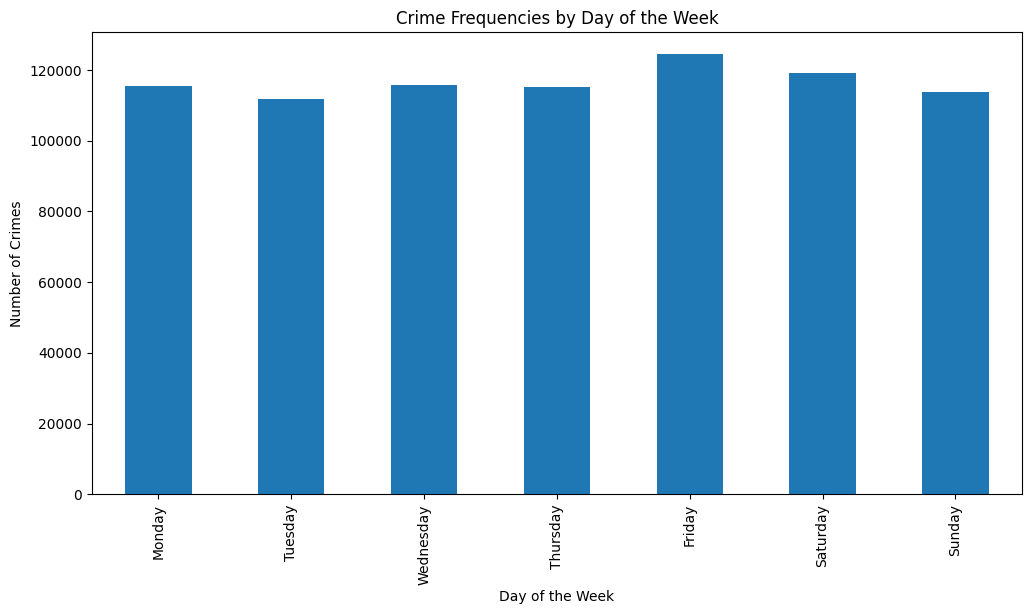

In [ ]:
df['Day of Week'] = df['DATE OCC'].dt.day_name()
day_counts = df['Day of Week'].value_counts()
day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', figsize=(12, 6))
plt.title('Crime Frequencies by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()
